# Scaling

In this exercise you will use estimagic's scaling capabilities to solve a badly scaled optimization problem. 

## Resources:

- [`slice_plot` example](https://estimagic.readthedocs.io/en/stable/how_to_guides/optimization/how_to_visualize_an_optimization_problem.html)
- [how to use scaling](https://estimagic.readthedocs.io/en/stable/how_to_guides/optimization/how_to_scale_optimization_problems.html)

In [1]:
import numpy as np
import estimagic as em

## Get a badly scaled problem from a benchmark set

In [2]:
problem = em.get_benchmark_problems(
    "more_wild", 
    scaling=True,
    scaling_options={"min_scale": 1, "max_scale": 100},
)["chebyquad_6"]

criterion = problem["inputs"]["criterion"]
start_params = problem["inputs"]["params"]
solution = problem["solution"]["value"]
solution

0

## Task 1: Plotting 

- Use `em.slice_plot` to to visualize `criterion`. Set the lower bounds as `start_params - 1` and the `upper_bounds` as `start_params + 1` and the center at `start_params`. 
- Repeat the plot, but this time use `lower_bounds = start_params - np.abs(0.1 * start_params)` and upper bounds analogously. 
- After looking at the plots, do you think that rescaling the problem with the `start_params` method will help?

## Solution 1:

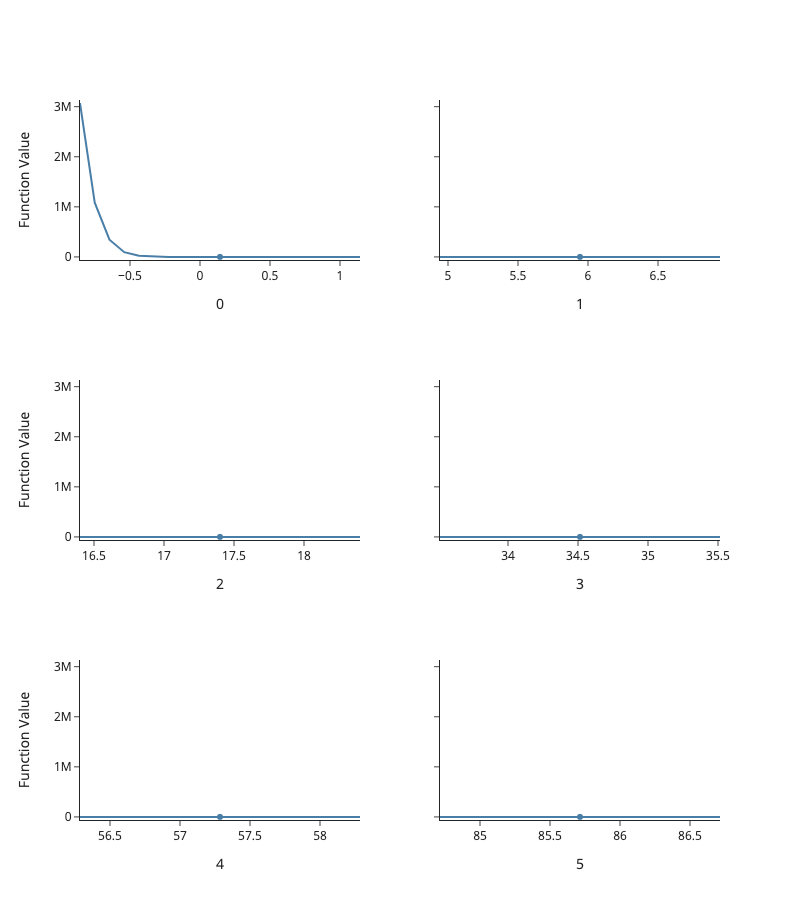

In [3]:
fig = em.slice_plot(
    func=criterion,
    params=start_params,
    lower_bounds=start_params-1,
    upper_bounds=start_params+1,
)
fig.show(renderer="png")

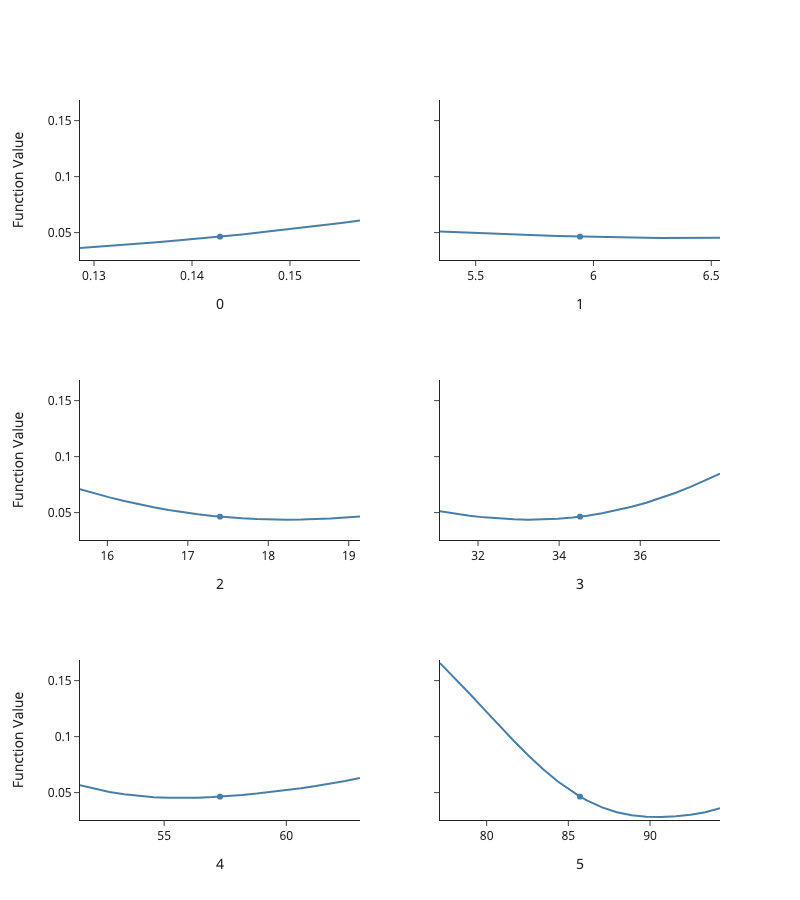

In [4]:
fig = em.slice_plot(
    func=criterion,
    params=start_params,
    lower_bounds=start_params-np.abs(0.1 * start_params),
    upper_bounds=start_params+np.abs(0.1 * start_params),
)
fig.show(renderer="png")

Yes! The parameters are scaled very differently.

## Task 2: Optimization

- Extend the code below by doing an optimization with `scaling=True` (store your results in the dictionary).
- Compare the scaled and unscaled optimization in the criterion_plot.

## Solution2:

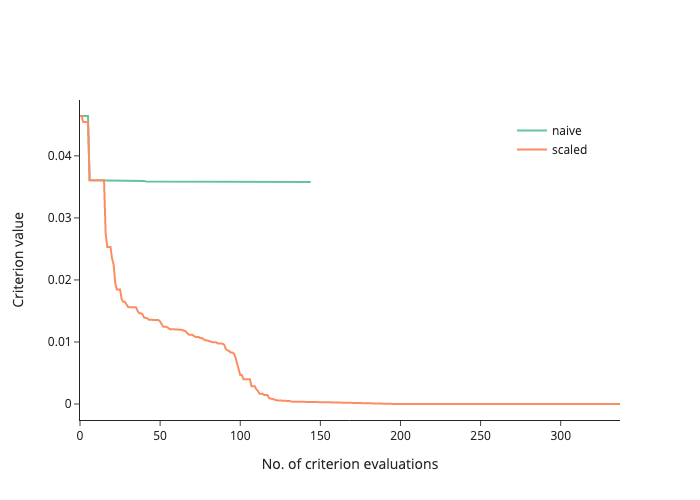

In [5]:
algorithm = "nag_pybobyqa"

res_naive = em.minimize(
    criterion,
    start_params,
    algorithm=algorithm,
)

res_scaled = em.minimize(
    criterion,
    start_params,
    algorithm=algorithm,
    scaling=True,
)

results = {"naive": res_naive, "scaled": res_scaled}

fig = em.criterion_plot(results, monotone=True)
fig.show(renderer="png")

## Optional tasks

- Try to find an optimizer that works well for a badly scaled problem.
- Run a benchmark on the the 'example' benchmark set, using the `scaling_options` as above and compare multiple optimizers.

In [6]:
problems = em.get_benchmark_problems(
    "example", 
    scaling=True,
    scaling_options={"min_scale": 1, "max_scale": 100},
)

optimizers = ["nlopt_neldermead", "scipy_lbfgsb", "nag_pybobyqa"]

results = em.run_benchmark(problems, optimize_options=optimizers, n_cores=2)

/Users/Tim_Mensinger/miniconda3/envs/scipy-estimagic/lib/python3.9/site-packages/pybobyqa/trust_region.py:147: RuntimeWarning: invalid value encountered in double_scalars
  stplen = (blen if shs <= 0.0 else min(blen, gredsq / shs))


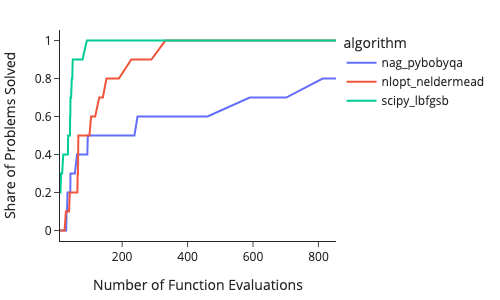

In [7]:
fig = em.profile_plot(problems, results)
fig.show(renderer="png")